# UMAP 20 to 5k Unique Document Frequency

In [2]:
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
from utils import extract_umls_cuis, generate_cui_translation_dictionary
import json
import umap
import scipy
from collections import Counter
import matplotlib

In [3]:
onehotmatrix = np.load('onehotdocbycui20to5k.npy')

with open('onehotsidtorowdict.json','r') as infile:
    includedsids = json.load(infile)
    
with open("onehotcuitocolumndict.json","r") as infile:
    includedcuis = json.load(infile)

In [4]:
reducer = umap.UMAP()

In [5]:
embedding = reducer.fit_transform(onehotmatrix)

In [6]:
embedding

array([[  8.299253 , -11.361439 ],
       [  1.6615902,   0.5902578],
       [  1.9996914,   4.8599625],
       ...,
       [  1.5348911,   4.8915854],
       [  1.2486801,   4.900563 ],
       [  1.5168349,   5.056716 ]], dtype=float32)

In [14]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

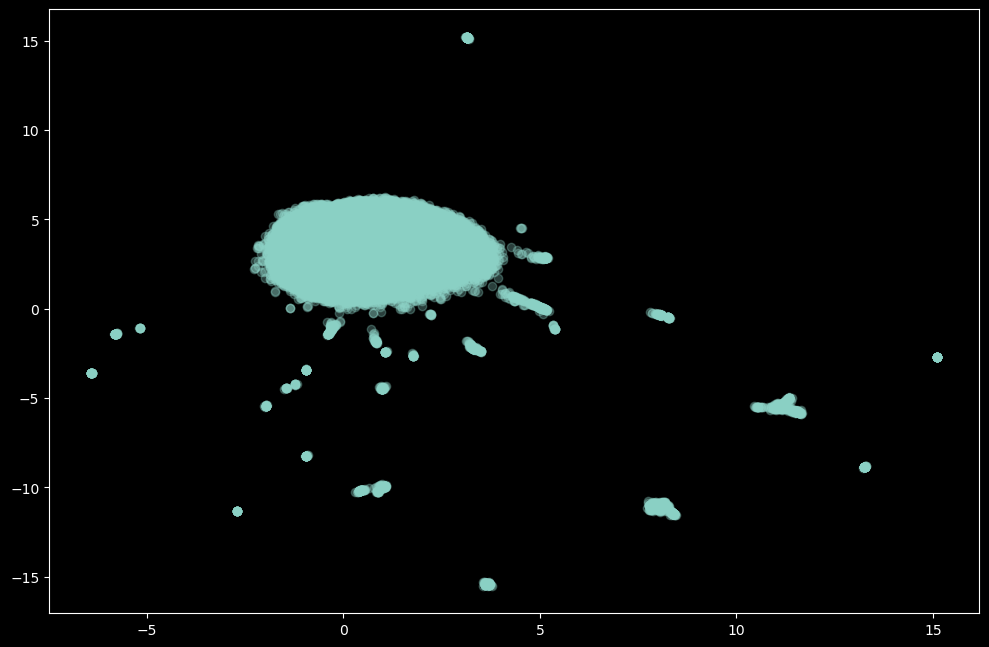

In [19]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.3)
plt.savefig("UMAPcluster20to5k.png")
plt.show()

In [18]:
strokeicd10s = set(['G43.609', 'G43.619', 'G43.601', 'G43.611', 'I60.00', 'I60.01', 'I60.02', 'I60.10', 'I60.11', 'I60.12', 'I60.2', 
                    'I60.30', 'I60.31', 'I60.32', 'I60.4', 'I60.50', 'I60.51', 'I60.52', 'I60.6', 'I60.7', 'I60.8', 'I60.9', 'I61.0', 
                    'I61.1', 'I61.2', 'I61.3', 'I61.4', 'I61.5', 'I61.6', 'I61.8', 'I61.9', 'I62.1', 'I62.00', 'I62.01', 'I62.02', 
                    'I62.03', 'I62.9', 'I63.02', 'I63.12', 'I63.22', 'I63.031', 'I63.032', 'I63.033', 'I63.039', 'I63.131', 'I63.132', 
                    'I63.133', 'I63.139', 'I63.231', 'I63.232', 'I63.233', 'I63.239', 'I63.011', 'I63.012', 'I63.013', 'I63.019', 'I63.111', 
                    'I63.112', 'I63.113', 'I63.119', 'I63.211', 'I63.212', 'I63.213', 'I63.219', 'I63.59', 'I63.09', 'I63.19', 'I63.59',
                    'I63.00', 'I63.10', 'I63.20', 'I63.29', 'I66.01', 'I66.02', 'I66.03', 'I66.09', 'I66.11', 'I66.12', 'I66.13', 'I66.19', 
                    'I66.21', 'I66.22', 'I66.23', 'I66.29', 'I66.3', 'I66.8', 'I66.9', 'I63.30', 'I63.311', 'I63.312', 'I63.313', 'I63.319', 
                    'I63.321', 'I63.322', 'I63.323', 'I63.329', 'I63.331', 'I63.332', 'I63.333', 'I63.339', 'I63.341', 'I63.342', 'I63.343', 
                    'I63.349', 'I63.39', 'I63.6', 'I63.40', 'I63.411', 'I63.412', 'I63.413', 'I63.419', 'I63.421', 'I63.422', 'I63.423',
                    'I63.429', 'I63.431', 'I63.432', 'I63.433', 'I63.439', 'I63.441', 'I63.442', 'I63.443', 'I63.449', 'I63.49', 'I63.50', 
                    'I63.511', 'I63.512', 'I63.513', 'I63.519', 'I63.521', 'I63.522', 'I63.523', 'I63.529', 'I63.531', 'I63.532', 'I63.533', 
                    'I63.539', 'I63.541', 'I63.542', 'I63.543', 'I63.549', 'I63.59', 'I63.8', 'I63.81', 'I63.89', 'I63.9', 'I67.89', 'I65.1', 
                    'I65.21', 'I65.22', 'I65.23', 'I65.29', 'I65.01', 'I65.02', 'I65.03', 'I65.09', 'I65.8', 'I65.9', 'I67.2', 'I67.81', 
                    'I67.82', 'I67.89', 'I67.1', 'I67.7', 'I68.2', 'I67.5', 'I67.6', 'G45.4', 'G46.3', 'G46.4', 'G46.5', 'G46.6', 'G46.7', 
                    'G46.8', 'I67.89', 'I68.0', 'I68.8', 'I67.9', 'G45.0', 'G45.8', 'G45.1', 'G45.2', 'G45.8', 'G46.0', 'G46.1', 'G46.2', 
                    'G45.9', 'I67.841', 'I67.848'])

In [20]:
with open("docidtooldesticds.json", 'r') as infile:
    docidstoicds = json.load(infile)

In [30]:
strokecodefordocid = dict()
for docid,icds in docidstoicds.items():
    strokecode = False
    for icd in icds:
        if icd in strokeicd10s:
            strokecode = True
            break
    if strokecode:
        strokecodefordocid[docid] = 1
    else:
        strokecodefordocid[docid] = 0

In [23]:
positiontosid = {v:k for k,v in includedsids.items()}

In [32]:
strokecodebyindex = [strokecodefordocid[positiontosid[i]] for i in range(0, len(positiontosid))]

In [33]:
len(strokecodebyindex)

29836

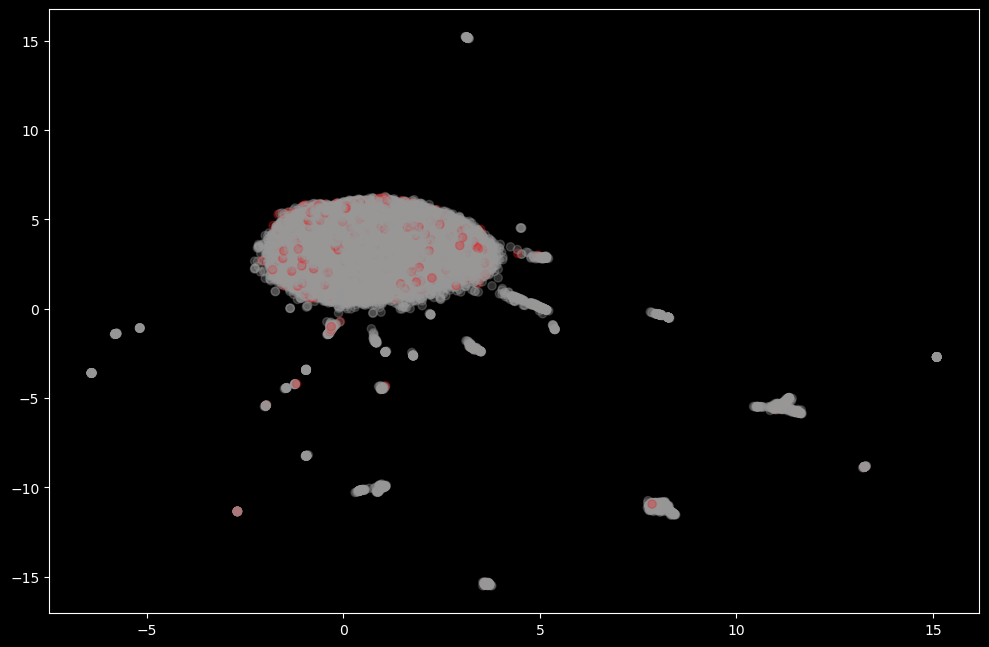

In [37]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=strokecodebyindex, alpha=0.3, cmap='Set1')
plt.savefig("UMAPcluster20to5k_coloredbystrokecode.png")
plt.show()

In [38]:
dizzinessicd10s = ['H81.01', 'H81.02', 'H81.03', 'H81.09', 'H81.10', 'H81.11', 'H81.12', 'H81.13', 'H81.20', 'H81.21', 'H81.22', 'H81.23', 'H81.311', 
                   'H81.312', 'H81.313', 'H81.319', 'H81.391', 'H81.392', 'H81.393', 'H81.399', 'H81.4', 'H81.41', 'H81.42', 'H81.43', 'H81.49', 
                   'H81.8X1', 'H81.8X2', 'H81.8X3', 'H81.8X9', 'H81.90', 'H81.91', 'H81.92', 'H81.93', 'H83.01', 'H83.02', 'H83.03', 'H83.09', 'H83.11', 
                   'H83.12', 'H83.13', 'H83.19', 'H83.2X1', 'H83.2X2', 'H83.2X3', 'H83.2X9', 'H83.3X1', 'H83.3X2', 'H83.3X3', 'H83.3X9', 'H83.8X1', 
                   'H83.8X2', 'H83.8X3', 'H83.8X9', 'H83.90', 'H83.91', 'H83.92', 'H83.93', 'R42.']

In [39]:
dizzycodefordocid = dict()
for docid,icds in docidstoicds.items():
    dizzycode = False
    for icd in icds:
        if icd in dizzinessicd10s:
            dizzycode = True
            break
    if dizzycode:
        dizzycodefordocid[docid] = 1
    else:
        dizzycodefordocid[docid] = 0
        
dizzycodebyindex = [dizzycodefordocid[positiontosid[i]] for i in range(0, len(positiontosid))]

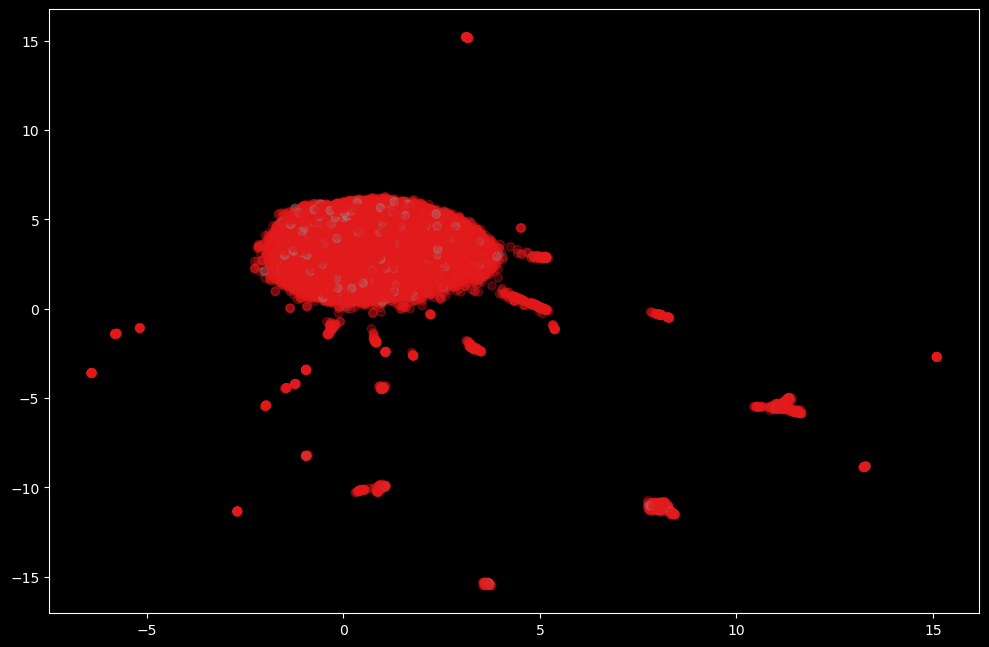

In [40]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=dizzycodebyindex, alpha=0.3, cmap='Set1')
plt.savefig("UMAPcluster20to5k_coloredbydizzycode.png")
plt.show()

In [41]:
headacheicd10s = ['G43.001', 'G43.009', 'G43.011', 'G43.019', 'G43.101', 'G43.109', 'G43.111', 'G43.119', 'G43.401', 'G43.409', 'G43.411', 'G43.419', 
                  'G43.501', 'G43.509', 'G43.511', 'G43.519', 'G43.601', 'G43.609', 'G43.611', 'G43.619', 'G43.701', 'G43.709', 'G43.711', 'G43.719', 
                  'G43.801', 'G43.809', 'G43.811', 'G43.819', 'G43.821', 'G43.829', 'G43.831', 'G43.839', 'G43.901', 'G43.909', 'G43.911', 'G43.919', 
                  'G43.A0', 'G43.A1', 'G43.B0', 'G43.B1', 'G43.C0', 'G43.C1', 'G43.D0', 'G43.D1', 'G44.001', 'G44.009', 'G44.011', 'G44.019', 'G44.021', 
                  'G44.029', 'G44.031', 'G44.039', 'G44.041', 'G44.049', 'G44.051', 'G44.059', 'G44.091', 'G44.099', 'G44.1', 'G44.201', 'G44.209', 
                  'G44.211', 'G44.219', 'G44.221', 'G44.229', 'G44.301', 'G44.309', 'G44.311', 'G44.319', 'G44.321', 'G44.329', 'G44.40', 'G44.41', 
                  'G44.51', 'G44.52', 'G44.53', 'G44.59', 'G44.81', 'G44.82', 'G44.83', 'G44.84', 'G44.85', 'G44.89', 'R51.']

In [42]:
headachecodefordocid = dict()
for docid,icds in docidstoicds.items():
    headachecode = False
    for icd in icds:
        if icd in headacheicd10s:
            headachecode = True
            break
    if headachecode:
        headachecodefordocid[docid] = 1
    else:
        headachecodefordocid[docid] = 0
        
headachecodebyindex = [headachecodefordocid[positiontosid[i]] for i in range(0, len(positiontosid))]

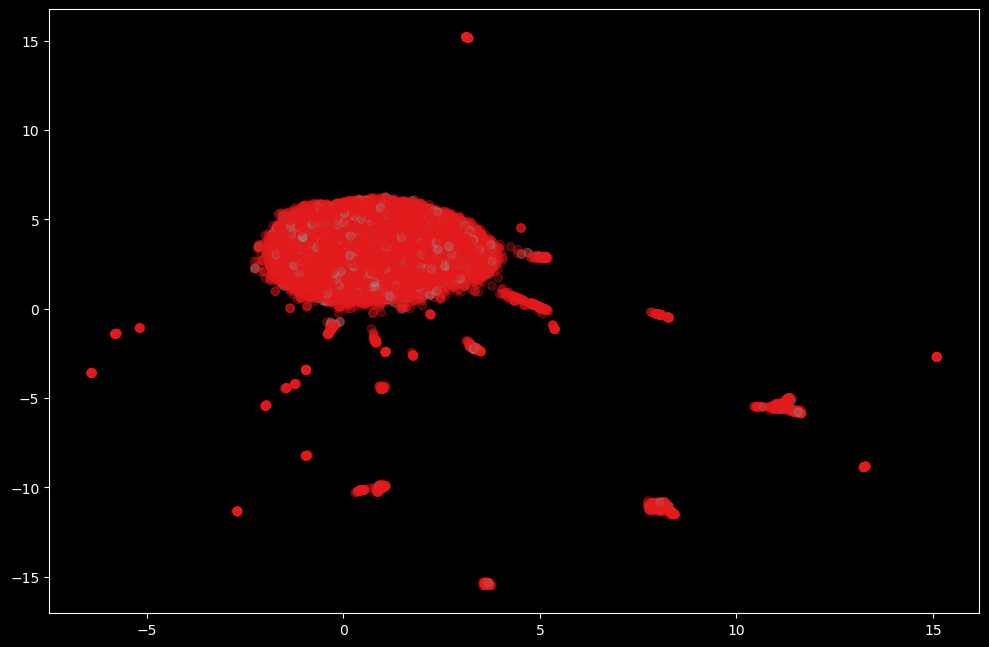

In [43]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=headachecodebyindex, alpha=0.3, cmap='Set1')
plt.savefig("UMAPcluster20to5k_coloredbyheadachecode.png")
plt.show()

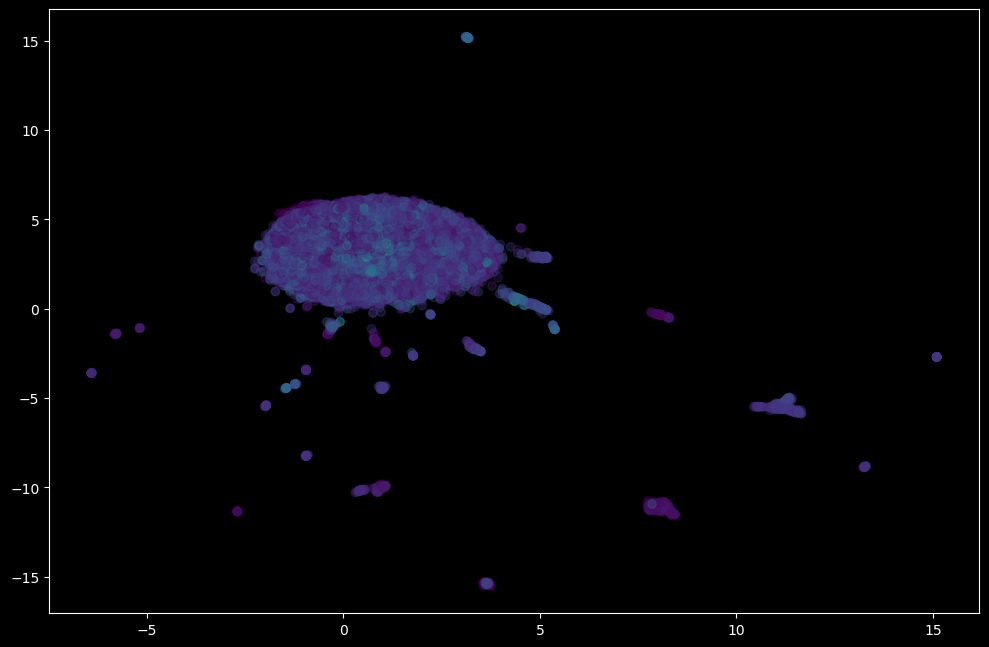

In [45]:
cuilen = np.sum(onehotmatrix, axis=1)
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], c=cuilen, alpha=0.3, cmap='viridis')
plt.savefig("UMAPcluster20to5k_coloredbycuilen.png")
plt.show()
    

In [ ]:
np.where(cuilen < 2)[0]

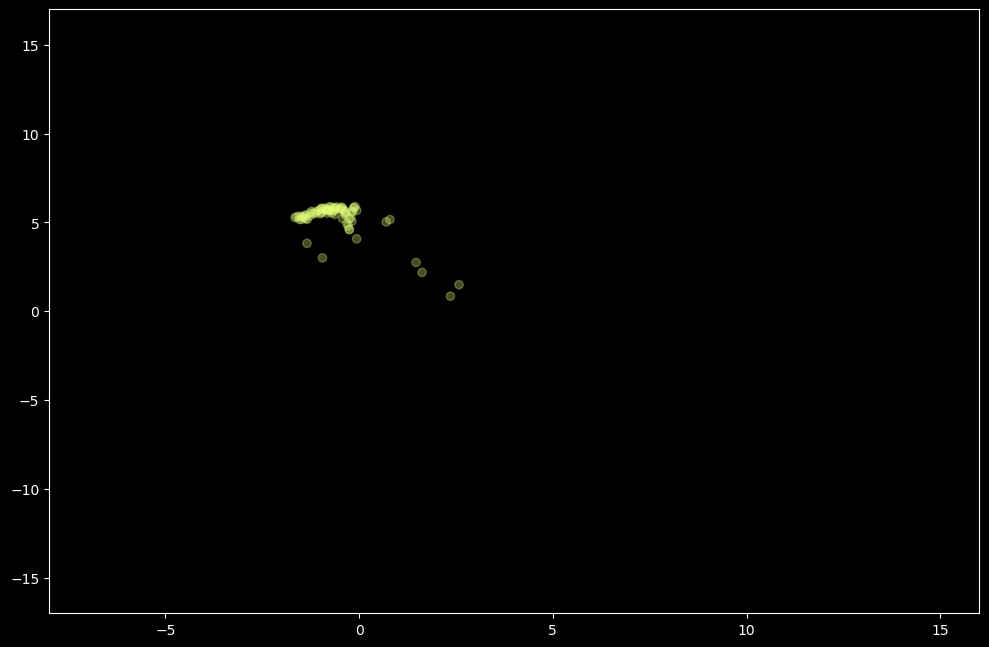

In [53]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0][np.where(cuilen < 2)[0]], embedding[:, 1][np.where(cuilen < 2)[0]], c=cuilen[np.where(cuilen < 2)[0]], alpha=0.3, cmap='Wistia')
plt.xlim([-8,16])
plt.ylim([-17,17])
plt.show()

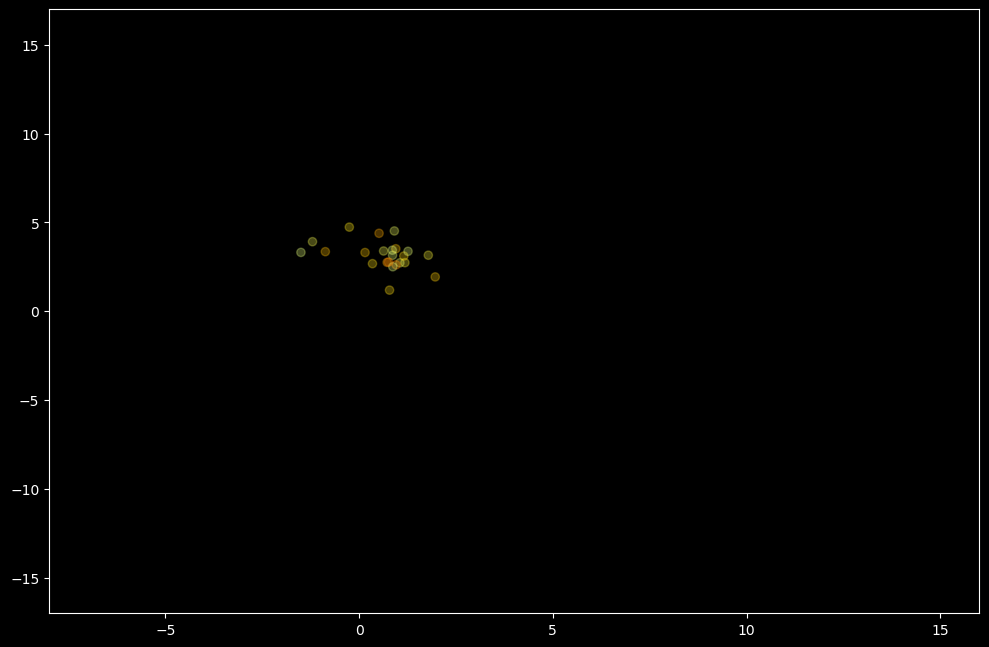

In [56]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0][np.where(cuilen > 300)[0]], embedding[:, 1][np.where(cuilen > 300)[0]], c=cuilen[np.where(cuilen > 300)[0]], alpha=0.3, cmap='Wistia')
plt.xlim([-8,16])
plt.ylim([-17,17])
plt.show()

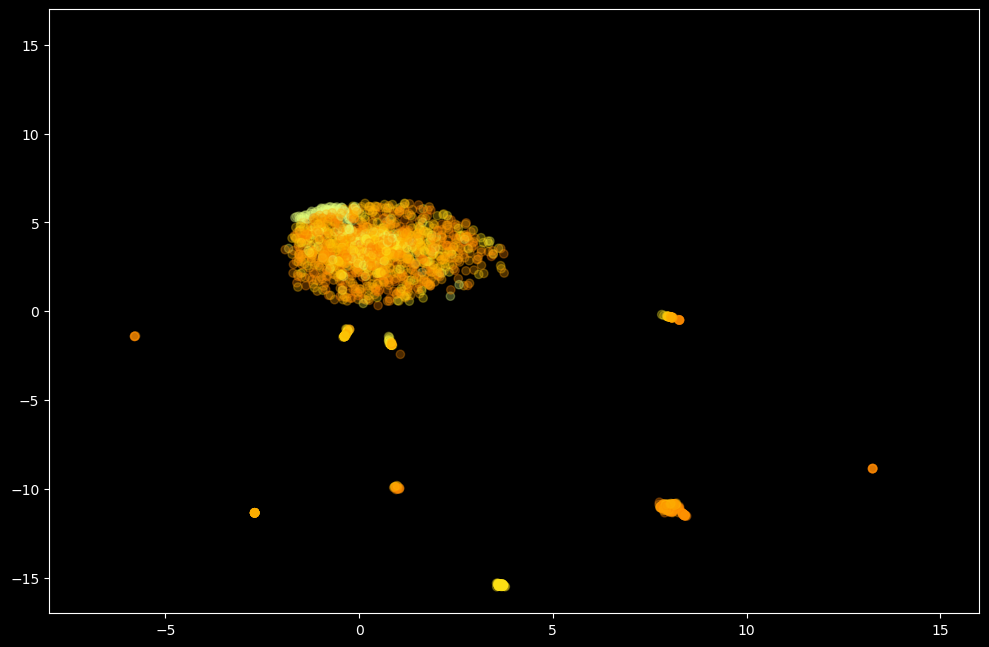

In [69]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0][np.where(cuilen < 20)[0]], embedding[:, 1][np.where(cuilen < 20)[0]], c=cuilen[np.where(cuilen < 20)[0]], alpha=0.3, cmap='Wistia')
plt.xlim([-8,16])
plt.ylim([-17,17])
plt.show()

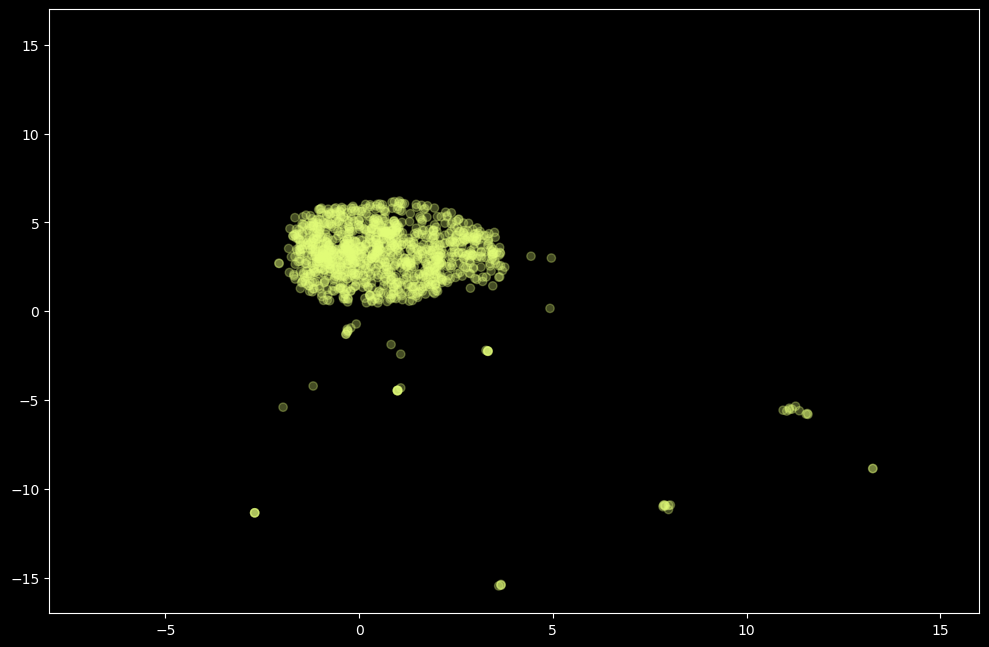

In [68]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0][np.where(np.asarray(strokecodebyindex) == 0)[0]], embedding[:, 1][np.where(np.asarray(strokecodebyindex) == 0)[0]], c=np.asarray(strokecodebyindex)[np.where(np.asarray(strokecodebyindex) == 0)[0]], alpha=0.3, cmap='Wistia')
plt.xlim([-8,16])
plt.ylim([-17,17])
plt.show()

In [ ]:
np.where(np.asarray(strokecodebyindex) == 0)

In [ ]:
np.where(embedding[:, 0] > 5)[0]

In [77]:
with open("cuitranslate.json",'r') as infile:
    cuitranslate = json.load(infile)

In [78]:
for ii in np.asarray([i for i in np.where(embedding[:, 1] < -10)[0] if i in np.where(embedding[:, 0] > 5)[0]])[:10]:
    for iii in np.where(onehotmatrix[ii] == 1)[0]:
        print(cuitranslate[includedcuis[iii]])

KeyError: 10

In [79]:
list(includedcuis.items())[:10]

[('C0059036', 0),
 ('C0017168', 1),
 ('C0019080', 2),
 ('C0360714', 3),
 ('C0028978', 4),
 ('C0034107', 5),
 ('C0085593', 6),
 ('C0013604', 7),
 ('C1623258', 8),
 ('C0043144', 9)]

In [80]:
positiontocuis = {v:k for k,v in includedcuis.items()}

In [82]:
cluster1positions = np.asarray([ii for ii in np.asarray([i for i in np.where(embedding[:, 1] < -10)[0] if i in np.where(embedding[:, 0] > 5)[0]])])

In [ ]:
np.where(np.sum(onehotmatrix[cluster1positions], axis=0) > np.max(np.sum(onehotmatrix[cluster1positions], axis=0)) - 50) 

In [100]:
for i in np.where(np.sum(onehotmatrix[cluster1positions], axis=0) > np.max(np.sum(onehotmatrix[cluster1positions], axis=0)) - 100)[0]:
    print(cuitranslate[positiontocuis[i]])

Injury wounds
Medical Home
Venous cannula insertion
Skin problem
Heparin Anticoagulant Reagents
Number of unhealed pressure ulcers at each stage - at assessment
PMP protocol
Electrode Grid
all access


In [115]:
len(set(np.where(onehotmatrix[:,929] == 1)[0]) - set(cluster1positions))

0

In [104]:
cluster1positions.shape

(488,)

In [122]:
np.intersect1d(np.where(onehotmatrix[:,929] == 1)[0], cluster1positions).size / np.where(onehotmatrix[:,929] == 1)[0].size

1.0

In [124]:
np.intersect1d(np.where(onehotmatrix[:,805] == 1)[0], cluster1positions).size / np.where(onehotmatrix[:,805] == 1)[0].size

0.8772563176895307

In [125]:
np.intersect1d(np.where(onehotmatrix[:,907] == 1)[0], cluster1positions).size / np.where(onehotmatrix[:,907] == 1)[0].size

0.9878048780487805

In [126]:
np.intersect1d(np.where(onehotmatrix[:,972] == 1)[0], cluster1positions).size / np.where(onehotmatrix[:,973] == 1)[0].size

1.0

In [127]:
reducer = umap.UMAP(metric='hamming')
embedding = reducer.fit_transform(onehotmatrix)

C:\Users\vhahoumowerj\Miniconda3\envs\ahrq\lib\site-packages\umap\umap_.py:1760: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


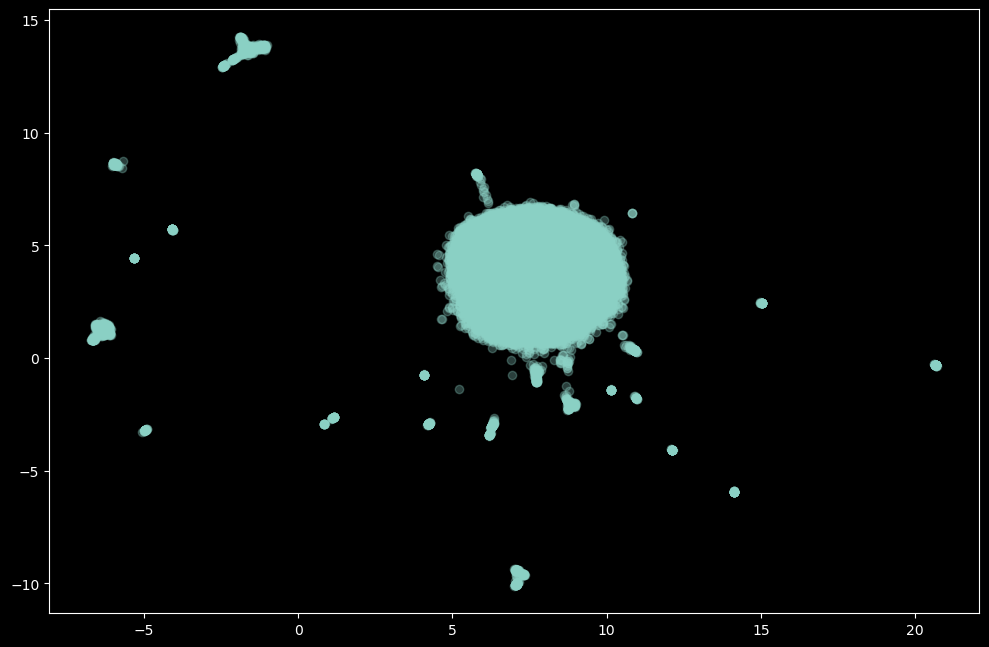

In [128]:
fig = plt.figure(figsize=(12,8), dpi=100)
plt.scatter(embedding[:, 0], embedding[:, 1], alpha=0.3)
plt.show()

ModuleNotFoundError: No module named 'plotly'